# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [107]:
!pip install citipy


In [108]:
from config import (weather_api_key, g_key)

# Dependencies
from citipy import citipy
import random
from random import uniform
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import pprint
from scipy.stats import linregress
import datetime

## Generate Cities List

In [109]:
# Creating a random Lat and Lon for cities search
def newlat():
   return uniform(-90, 90)

def newlon():
   return uniform(-180,180)
 

In [110]:
# Looking up city coordinates with citipy
cities_list = []

for x in range(550):
    city = citipy.nearest_city(newlat(), newlon())
    cities_list.append(city)

# cities_list

cities = pd.Series(city.city_name for city in cities_list)

cities.head(20)

0              dikson
1              gandia
2             lautaro
3           iskateley
4       murray bridge
5            thompson
6         tuktoyaktuk
7              albany
8           flin flon
9           tuatapere
10          flin flon
11             hasaki
12            qaanaaq
13            rikitea
14             albany
15     saint-philippe
16    haines junction
17           bengkulu
18        east london
19           kandrian
dtype: object

In [111]:
# len(cities)

550

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [112]:
# Building the OpenWeatherMap query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + 'reno').json() #Testing response with Reno
pprint.pprint(response)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 39.53, 'lon': -119.81},
 'dt': 1601446551,
 'id': 5511077,
 'main': {'feels_like': 11.3,
          'humidity': 33,
          'pressure': 1025,
          'temp': 15.06,
          'temp_max': 17,
          'temp_min': 13.33},
 'name': 'Reno',
 'sys': {'country': 'US',
         'id': 5689,
         'sunrise': 1601387636,
         'sunset': 1601430277,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 238, 'speed': 2.31}}


In [113]:
# set up lists to hold reponse info
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
clouds=[]
wind=[]
country=[]
date=[]

# Loop for OpenWeatherMap API calls
print("Beginning Data Retrieval \n-----------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(float(response['coord']['lat']))
        lng.append(float(response['coord']['lon']))
        max_temp.append(float(response['main']['temp_max']))
        humidity.append(float(response['main']['humidity']))
        clouds.append(float(response['clouds']['all']))
        wind.append(float(response['wind']['speed']))
        country.append(response['sys']['country'])
        date.append(int(response['dt']))
        print(f"Processing request {len(city_name)} for {city}")
    except KeyError:
        print(f"X--X {city} not found. Skipping...")
        city_name.append(None)
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        clouds.append(None)
        wind.append(None)
        country.append(None)
        date.append(None)

# print(date)
    

Beginning Data Retrieval 
-----------------------------
Processing request 1 for dikson
Processing request 2 for gandia
Processing request 3 for lautaro
Processing request 4 for iskateley
Processing request 5 for murray bridge
Processing request 6 for thompson
Processing request 7 for tuktoyaktuk
Processing request 8 for albany
Processing request 9 for flin flon
Processing request 10 for tuatapere
Processing request 11 for flin flon
Processing request 12 for hasaki
Processing request 13 for qaanaaq
Processing request 14 for rikitea
Processing request 15 for albany
Processing request 16 for saint-philippe
Processing request 17 for haines junction
Processing request 18 for bengkulu
Processing request 19 for east london
Processing request 20 for kandrian
Processing request 21 for cape town
Processing request 22 for pisco
Processing request 23 for ancud
Processing request 24 for nouadhibou
Processing request 25 for isangel
Processing request 26 for chirongui
X--X geresk not found. Skipping

Processing request 229 for codrington
Processing request 230 for chokurdakh
Processing request 231 for rio grande
Processing request 232 for kapaa
Processing request 233 for ola
X--X samusu not found. Skipping...
Processing request 235 for vaini
Processing request 236 for north platte
Processing request 237 for longyearbyen
Processing request 238 for haines junction
Processing request 239 for ushuaia
Processing request 240 for bluff
Processing request 241 for bacolod
Processing request 242 for talnakh
Processing request 243 for mount isa
Processing request 244 for pisco
Processing request 245 for jamestown
Processing request 246 for mwinilunga
Processing request 247 for avarua
Processing request 248 for rikitea
Processing request 249 for kahului
Processing request 250 for tiksi
Processing request 251 for mar del plata
Processing request 252 for cabo san lucas
Processing request 253 for mataura
Processing request 254 for butaritari
Processing request 255 for busselton
Processing request

Processing request 456 for lagoa
Processing request 457 for bambous virieux
Processing request 458 for teya
Processing request 459 for bonavista
Processing request 460 for bluff
Processing request 461 for tortoli
Processing request 462 for jamestown
Processing request 463 for coquimbo
Processing request 464 for ponta do sol
Processing request 465 for souillac
Processing request 466 for mashhad
Processing request 467 for kunda
Processing request 468 for east london
X--X wahran not found. Skipping...
Processing request 470 for touros
Processing request 471 for half moon bay
Processing request 472 for bengkulu
Processing request 473 for kapaa
Processing request 474 for rikitea
Processing request 475 for palana
Processing request 476 for usinsk
Processing request 477 for tautira
Processing request 478 for thompson
Processing request 479 for rikitea
Processing request 480 for chuy
Processing request 481 for ushuaia
Processing request 482 for kavieng
Processing request 483 for yinchuan
X--X 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
city_data = pd.DataFrame(
    {'City': city_name,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': max_temp,
     'Humidity': humidity,
     'Cloudiness': clouds,
     'Wind Speed': wind,
     'Country': country,
     'Date': date
    })

city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,2.16,81.0,100.0,5.47,RU,1.601447e+09
1,Gandia,38.97,-0.18,16.11,8.0,56.0,0.45,ES,1.601447e+09
2,Lautaro,-38.52,-72.45,7.00,93.0,75.0,4.10,CL,1.601447e+09
3,Iskateley,67.68,53.15,8.49,82.0,10.0,4.99,RU,1.601447e+09
4,Murray Bridge,-35.12,139.27,14.44,93.0,90.0,4.47,AU,1.601447e+09
...,...,...,...,...,...,...,...,...,...
545,Hilo,19.73,-155.09,27.00,74.0,20.0,2.10,US,1.601447e+09
546,Atuona,-9.80,-139.03,25.96,75.0,2.0,9.94,PF,1.601447e+09
547,Ozernovskiy,51.50,156.52,10.51,81.0,34.0,1.85,RU,1.601447e+09
548,Yellowknife,62.46,-114.35,3.33,100.0,20.0,3.10,CA,1.601447e+09


In [115]:
city_data = city_data.dropna()
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,2.16,81.0,100.0,5.47,RU,1.601447e+09
1,Gandia,38.97,-0.18,16.11,8.0,56.0,0.45,ES,1.601447e+09
2,Lautaro,-38.52,-72.45,7.00,93.0,75.0,4.10,CL,1.601447e+09
3,Iskateley,67.68,53.15,8.49,82.0,10.0,4.99,RU,1.601447e+09
4,Murray Bridge,-35.12,139.27,14.44,93.0,90.0,4.47,AU,1.601447e+09
...,...,...,...,...,...,...,...,...,...
545,Hilo,19.73,-155.09,27.00,74.0,20.0,2.10,US,1.601447e+09
546,Atuona,-9.80,-139.03,25.96,75.0,2.0,9.94,PF,1.601447e+09
547,Ozernovskiy,51.50,156.52,10.51,81.0,34.0,1.85,RU,1.601447e+09
548,Yellowknife,62.46,-114.35,3.33,100.0,20.0,3.10,CA,1.601447e+09


In [116]:
city_data.to_csv('../Resources/city_data.csv', encoding='utf-8')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [117]:
## If closing Jupyter Notebook, read in the saved city_data.csv instead of re-reunning OpenWeatherMap API calls
# city_data = pd.read_csv('../Resources/city_data.csv', encoding='utf-8')
# del city_data['Unnamed: 0', 'level_0']

# Sort cities by Humidity, descending
city_data = city_data.reset_index(drop=True,)
city_data.sort_values(by='Humidity', ascending=False)

# city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
266,Ushuaia,-54.80,-68.30,-1.00,100.0,75.0,7.70,AR,1.601447e+09
140,Ushuaia,-54.80,-68.30,-1.00,100.0,75.0,7.70,AR,1.601447e+09
121,Ushuaia,-54.80,-68.30,-1.00,100.0,75.0,7.70,AR,1.601447e+09
246,Ushuaia,-54.80,-68.30,-1.00,100.0,75.0,7.70,AR,1.601447e+09
111,Albany,42.60,-73.97,13.89,100.0,90.0,1.50,US,1.601447e+09
...,...,...,...,...,...,...,...,...,...
232,Mount Isa,-20.73,139.50,36.00,14.0,40.0,3.10,AU,1.601447e+09
208,Mount Isa,-20.73,139.50,36.00,14.0,40.0,3.10,AU,1.601447e+09
383,Saint George,37.10,-113.58,20.56,14.0,1.0,2.10,US,1.601447e+09
218,Barstow,34.90,-117.02,24.00,12.0,1.0,2.60,US,1.601447e+09


In [121]:
#  Get the indices of cities that have humidity over 100%.
too_humid = city_data.loc[city_data['Humidity'] > 100]
too_humid.index

Int64Index([], dtype='int64')

In [122]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(too_humid.index, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,2.16,81.0,100.0,5.47,RU,1.601447e+09
1,Gandia,38.97,-0.18,16.11,8.0,56.0,0.45,ES,1.601447e+09
2,Lautaro,-38.52,-72.45,7.00,93.0,75.0,4.10,CL,1.601447e+09
3,Iskateley,67.68,53.15,8.49,82.0,10.0,4.99,RU,1.601447e+09
4,Murray Bridge,-35.12,139.27,14.44,93.0,90.0,4.47,AU,1.601447e+09
...,...,...,...,...,...,...,...,...,...
515,Hilo,19.73,-155.09,27.00,74.0,20.0,2.10,US,1.601447e+09
516,Atuona,-9.80,-139.03,25.96,75.0,2.0,9.94,PF,1.601447e+09
517,Ozernovskiy,51.50,156.52,10.51,81.0,34.0,1.85,RU,1.601447e+09
518,Yellowknife,62.46,-114.35,3.33,100.0,20.0,3.10,CA,1.601447e+09


In [123]:
# Export the clean_city_data to CSV
clean_city_data.to_csv('../Resources/clean_city_data.csv', encoding='utf-8')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [124]:
clean_city_data = clean_city_data.reset_index(drop=True,)
clean_city_data.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,2.16,81.0,100.0,5.47,RU,1.601447e+09
1,Gandia,38.97,-0.18,16.11,8.0,56.0,0.45,ES,1.601447e+09
2,Lautaro,-38.52,-72.45,7.00,93.0,75.0,4.10,CL,1.601447e+09


In [125]:

# Converting the Unix date value for plot titles
date = datetime.datetime.fromtimestamp(clean_city_data.Date[0])
date = f"{date:%Y-%m-%d}"
date

'2020-09-29'

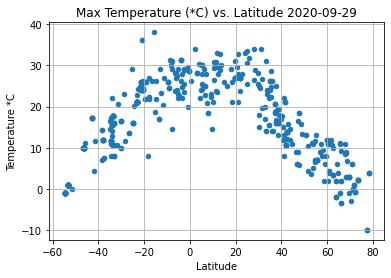

In [126]:
clean_city_data.plot.scatter(x='Lat', y='Max Temp')

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature *C')
plt.title(f'Max Temperature (*C) vs. Latitude {date}')
plt.grid(True)

# Save the figure
plt.savefig("../Output/MaxTemp_WorldCities.png")

In [ ]:
# Here the code is plotting the gathered Max Temp values for each city against their latitudes. There is a distinctive 
# pattern showing an increase in Max Temps at lower latitudes, around the equator, creating this bell-shaped distribution 
# of this dataset. (Compares favorably with the sample, below)

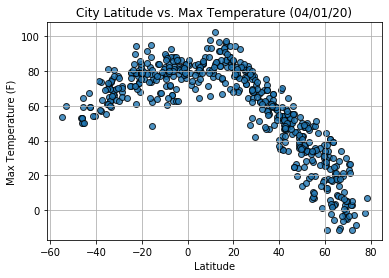

## Latitude vs. Humidity Plot

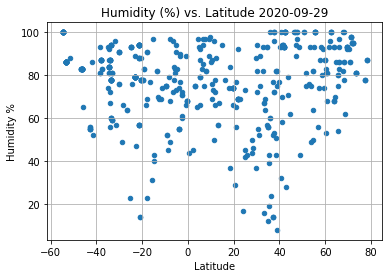

In [127]:
clean_city_data.plot.scatter(x='Lat', y='Humidity')

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Humidity (%) vs. Latitude {date}')
plt.grid(True)

# Save the figure
plt.savefig("../Output/Humidity_WorldCities.png")

In [ ]:
# Here we have humidity plotted against latitude. Visually, it seems like the data is fairly evenly distributed without 
# much of a pattern - although, it does seem like the world's deserts may be visible in this representation, clustered 
# around -20* and between 20*-40* of latitude.

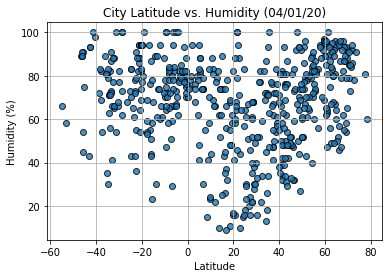

## Latitude vs. Cloudiness Plot

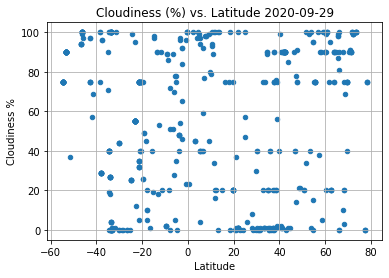

In [128]:
clean_city_data.plot.scatter(x='Lat', y='Cloudiness')

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Cloudiness (%) vs. Latitude {date}')
plt.grid(True)

# Save the figure
plt.savefig("../Output/Cloudiness_WorldCities.png")

In [ ]:
# In this figure, we have the distribution of the cities' cloudiness plotted with respect to latitude. There doesn't appear 
# to be any discernable pattern depicted in the plot, with the data points evenly distributed across the figure. Clouds truly
# know no bounds...

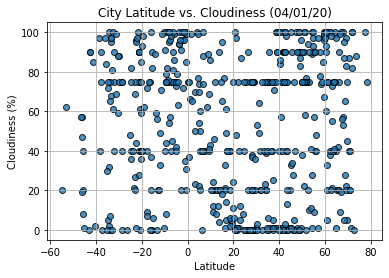

## Latitude vs. Wind Speed Plot

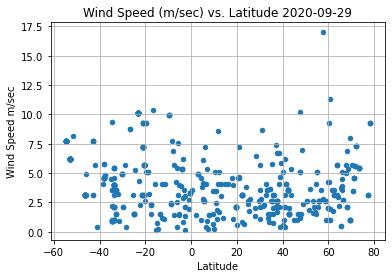

In [129]:
clean_city_data.plot.scatter(x='Lat', y='Wind Speed')

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/sec')
plt.title(f'Wind Speed (m/sec) vs. Latitude {date}')
plt.grid(True)

# Save the figure
plt.savefig("../Output/WindSpeed_WorldCities.png")

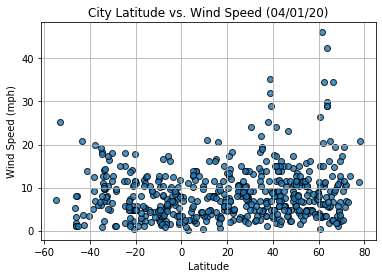

In [13]:
# This plot depicts the distribution of wind speeds found in the cities sampled. There seems to be an upper limit of about
# 11-12 meters per second, with one outlier of near 17 m/sec. But otherwise, there doesn't seem to be any obvious relationship 
# between latitude and wind speed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [130]:
north_cities = clean_city_data.loc[clean_city_data['Lng']> 0]
north_cities.head(2)

# north_cities.plot.scatter(x='Lat', y='Max Temp')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,2.16,81.0,100.0,5.47,RU,1.601447e+09
3,Iskateley,67.68,53.15,8.49,82.0,10.0,4.99,RU,1.601447e+09


R squared: 0.06529305376773804


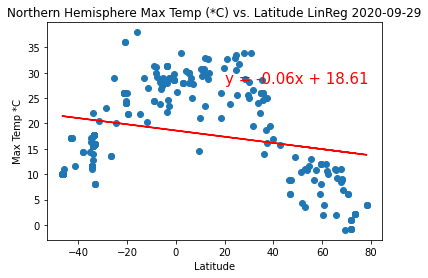

In [131]:
# Convert to floats and store Lat and Max Temp as x and y values
x_values = north_cities['Lat'].astype('float')
y_values = north_cities['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,28),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp *C')
plt.title(f'Northern Hemisphere Max Temp (*C) vs. Latitude LinReg {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/LinReg_MaxTemp_NorthCities.png")

# Show plot
plt.show()

In [ ]:
The Northern Hemisphere plot of Max Temps seem to mirror that of the Global sample in general. 

The r-value is: 0.46937863826630627


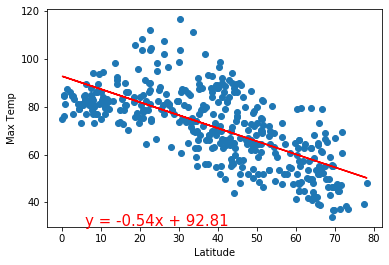

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [90]:
south_cities = clean_city_data.loc[clean_city_data['Lng']< 0]
south_cities.head(2)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,13.00,71.0,75.0,4.10,CA,1.601410e+09
2,Rikitea,-23.12,-134.97,21.35,78.0,54.0,9.75,PF,1.601410e+09


R squared: 0.25102879561576624


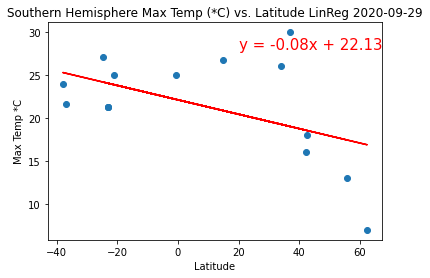

In [101]:
# Convert to floats and store Lat and Max Temp as x and y values
x_values = south_cities['Lat'].astype('float')
y_values = south_cities['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,28),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp *C')
plt.title(f'Southern Hemisphere Max Temp (*C) vs. Latitude LinReg {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/LinReg_MaxTemp_SouthCities.png")

# Show plot
plt.show()

The r-value is: 0.6082708688906918


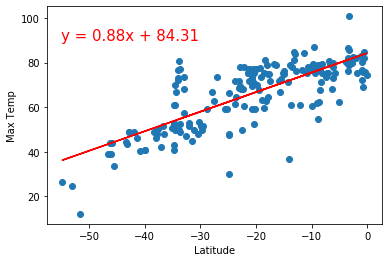

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0004859045512227915


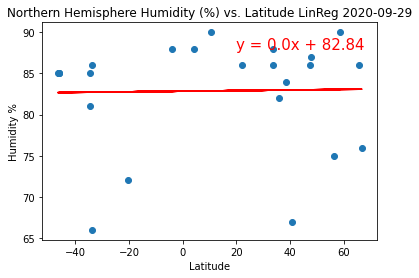

In [97]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = north_cities['Lat'].astype('float')
y_values = north_cities['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,88),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Northern Hemisphere Humidity (%) vs. Latitude LinReg {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/LinReg_Humidity_NorthCities.png")

# Show plot
plt.show()

The r-value is: 0.000543987878808455


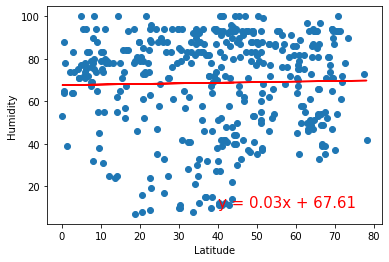

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.010176923893903997


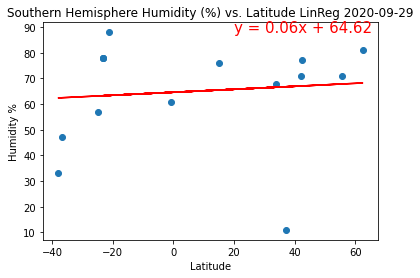

In [103]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = south_cities['Lat'].astype('float')
y_values = south_cities['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,88),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Southern Hemisphere Humidity (%) vs. Latitude LinReg {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/LinReg_Humidity_SouthCities.png")

# Show plot
plt.show()

The r-value is: 0.014985174297345524


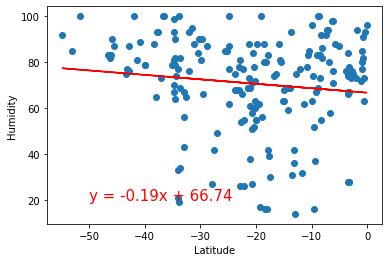

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03708840508291713


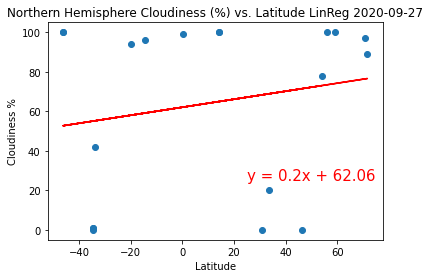

In [25]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = north_cities['Lat'].astype('float')
y_values = north_cities['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Northern Hemisphere Cloudiness (%) vs. Latitude LinReg {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/LinReg_Cloudiness_NorthCities.png")

# Show plot
plt.show()

The r-value is: 0.0020898727664228514


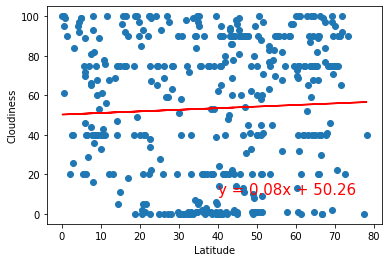

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.1379951603499958


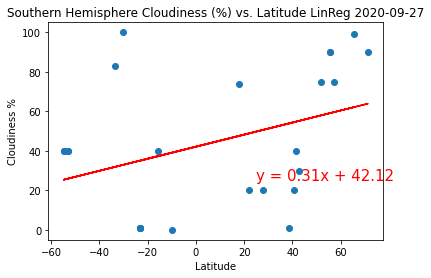

In [26]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = south_cities['Lat'].astype('float')
y_values = south_cities['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Southern Hemisphere Cloudiness (%) vs. Latitude LinReg {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/LinReg_Cloudiness_SouthCities.png")

# Show plot
plt.show()

The r-value is: 0.0035263772085582894


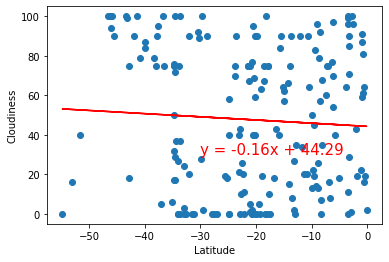

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.1701562303418156


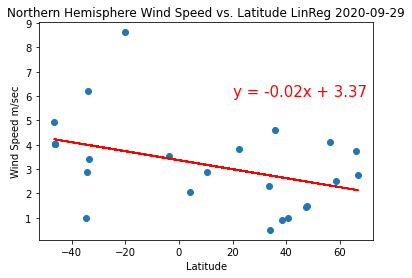

In [104]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = north_cities['Lat'].astype('float')
y_values = north_cities['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,6),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/sec')
plt.title(f'Northern Hemisphere Wind Speed vs. Latitude LinReg {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/LinReg_WindSpeed_NorthCities.png")

# Show plot
plt.show()

The r-value is: 0.04019723576144484


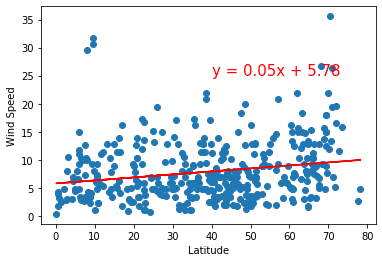

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.043439542803593315


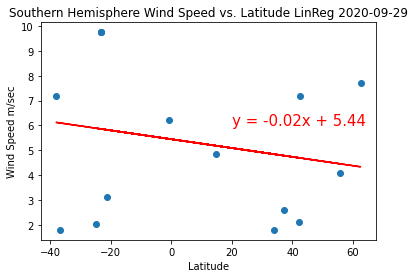

In [106]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = south_cities['Lat'].astype('float')
y_values = south_cities['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,6),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/sec')
plt.title(f'Southern Hemisphere Wind Speed vs. Latitude LinReg {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/LinReg_WindSpeed_SouthCities.png")

# Show plot
plt.show()

The r-value is: 0.017128274759839232


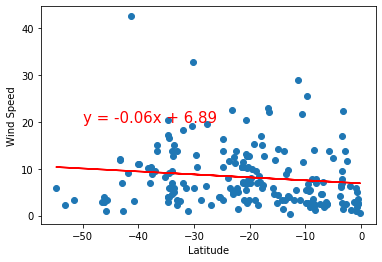